# Q1 :     A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


Step 1 : Define null and alternative hypothesis


 
 Null Hypothesis :  Cutlets diameter of both two units is same $$\mu1=\mu2 $$
 Alternate Hypothesis :Cutlets diameter of both two units is different $$\mu1 \not= \mu2 $$
 
So we can unerstand that it is type 1 (Two Tail) test .We need to comapre to samples so we need to
choose two sample test.

Step 2:Examine data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore") 

In [2]:
cutlet_df = pd.read_csv('Cutlets.csv')
cutlet_df.head(10)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [3]:
cutlet_df.shape

(35, 2)

In [4]:
cutlet_df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [5]:
cutlet_df.isnull().value_counts()

Unit A  Unit B
False   False     35
dtype: int64

In [6]:
cutlet_df.isna().sum()

Unit A    0
Unit B    0
dtype: int64

<AxesSubplot:xlabel='Unit A', ylabel='Count'>

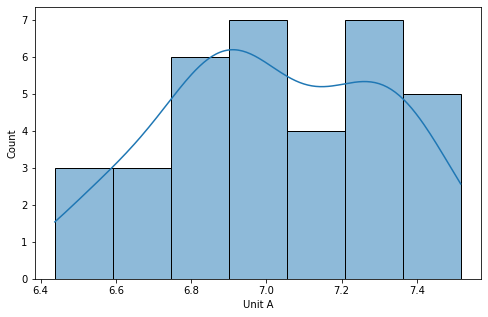

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(data=cutlet_df['Unit A'],kde=True)


<AxesSubplot:xlabel='Unit B', ylabel='Count'>

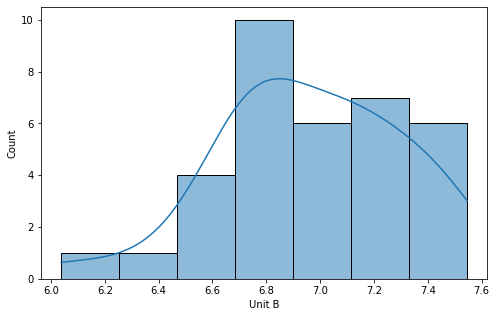

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(data=cutlet_df['Unit B'],kde=True)

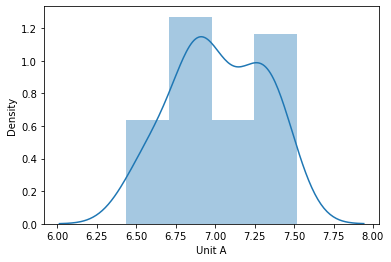

In [9]:
sns.distplot(cutlet_df['Unit A']);

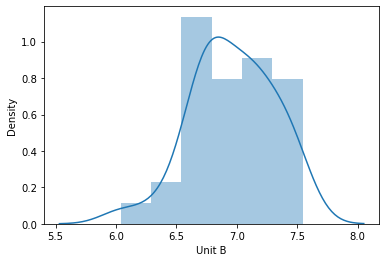

In [10]:
sns.distplot(cutlet_df['Unit B']);

# Plotting Q-Q plot to check whether the distribution follows normal distribution or not

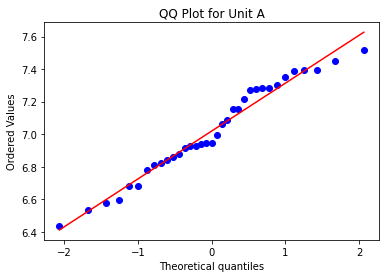

In [11]:
stats.probplot(cutlet_df['Unit A'],dist='norm',plot=plt)
plt.title('QQ Plot for Unit A')
plt.show()

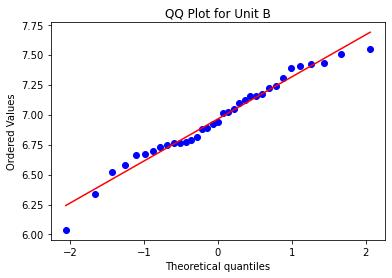

In [12]:
stats.probplot(cutlet_df['Unit B'],dist='norm',plot=plt)
plt.title('QQ Plot for Unit B')
plt.show()

In [13]:
stats.ttest_ind(cutlet_df['Unit A'],cutlet_df['Unit B'],alternative='two-sided')

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

    Now , given significance level α = 0.05/2 = 0.025(For two tail test α/2 )
    The p-value calculated from above code = 0.472
    So p-value is much greater than α.If p>α we can't reject
    null hypothesis .So ,Null Hypothesis : 'Cutlets diameter of both two units is same'
    is accepted.

# Q2 :A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
  
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
 

Step 1 : Define null and alternative hypothesis

Null Hypothesis :  There is no difference in average TAT among the different laboratories 

Alternate Hypothesis :Atleast one of them is different 



In [14]:
lab_tat_df = pd.read_csv('LabTAT.csv')

In [15]:
lab_tat_df.head(10)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
5,179.45,197.00,181.51,161.12
6,191.37,166.36,214.21,154.02
7,166.81,169.60,183.43,163.25
8,158.81,175.36,191.60,152.79
9,165.88,198.68,208.43,161.98


In [16]:
lab_tat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [17]:
lab_tat_df.isna().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [18]:
lab_tat_df.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [19]:
lab_tat_df.rename(columns={'Laboratory 1':'lab1','Laboratory 2':'lab2','Laboratory 3':'lab3',
                  'Laboratory 4':'lab4'},inplace=True)
lab_tat_df.head()

,lab1,lab2,lab3,lab4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


Checking for outliers

<AxesSubplot:title={'center':'Box plot for Lab 1'}, xlabel='lab1'>

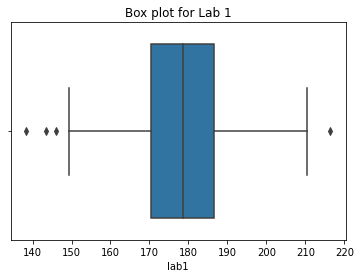

In [20]:
plt.title('Box plot for Lab 1')
sns.boxplot(lab_tat_df['lab1'])

In [21]:
lab_tat_df[(lab_tat_df['lab1']<150) | (lab_tat_df['lab1']>210)]

,lab1,lab2,lab3,lab4
48,216.39,193.28,177.76,161.42
66,138.30,176.63,193.08,128.93
72,143.52,168.20,213.18,124.06
84,210.38,161.45,238.70,157.48
93,149.24,168.80,188.53,156.79
114,145.89,175.16,203.39,139.34


<AxesSubplot:title={'center':'Box plot for Lab 2'}, xlabel='lab2'>

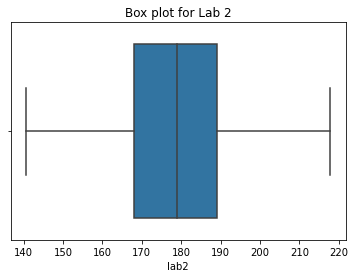

In [22]:
plt.title('Box plot for Lab 2')
sns.boxplot(lab_tat_df['lab2'])

In [23]:
#No outlier found for lab 2

<AxesSubplot:title={'center':'Box plot for Lab 3'}, xlabel='lab3'>

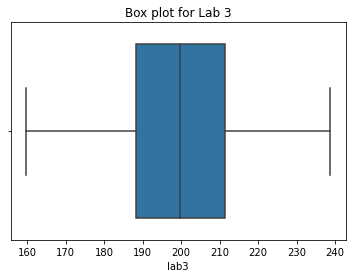

In [24]:
plt.title('Box plot for Lab 3')
sns.boxplot(lab_tat_df['lab3'])

In [25]:
#No outlier found for lab 3

<AxesSubplot:title={'center':'Box plot for Lab 4'}, xlabel='lab4'>

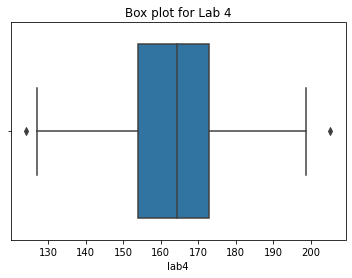

In [26]:
plt.title('Box plot for Lab 4')
sns.boxplot(lab_tat_df['lab4'])

In [27]:
lab_tat_df[(lab_tat_df['lab4']<130) | (lab_tat_df['lab4']>200)]

,lab1,lab2,lab3,lab4
66,138.30,176.63,193.08,128.93
72,143.52,168.20,213.18,124.06
108,166.35,167.72,208.33,126.94
109,175.41,199.90,172.86,205.18


In [28]:
lab_tat_df[((lab_tat_df['lab1']<150) | (lab_tat_df['lab1']>210)) & ((lab_tat_df['lab4']<130) | (lab_tat_df['lab4']>200))]

,lab1,lab2,lab3,lab4
66,138.30,176.63,193.08,128.93
72,143.52,168.20,213.18,124.06


<AxesSubplot:xlabel='lab1', ylabel='Density'>

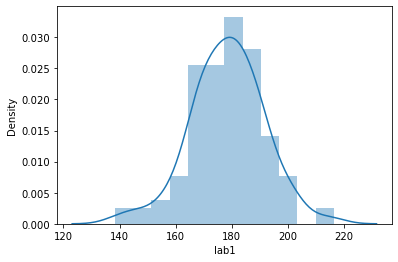

In [29]:
sns.distplot(lab_tat_df['lab1'])

<AxesSubplot:xlabel='lab2', ylabel='Density'>

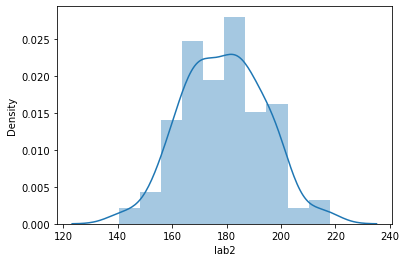

In [30]:
sns.distplot(lab_tat_df['lab2'])

<AxesSubplot:xlabel='lab3', ylabel='Density'>

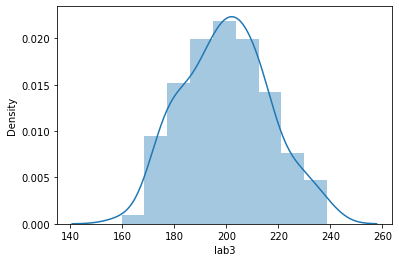

In [31]:
sns.distplot(lab_tat_df['lab3'])

<AxesSubplot:xlabel='lab4', ylabel='Density'>

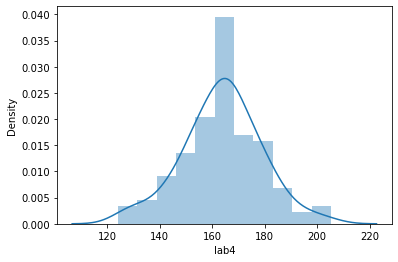

In [32]:
sns.distplot(lab_tat_df['lab4'])

# Plotting Q-Q plot to check whether the distribution follows normal distribution or not

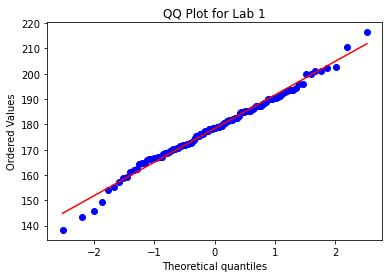

In [33]:
stats.probplot(lab_tat_df['lab1'],dist='norm',plot=plt)
plt.title('QQ Plot for Lab 1')
plt.show()

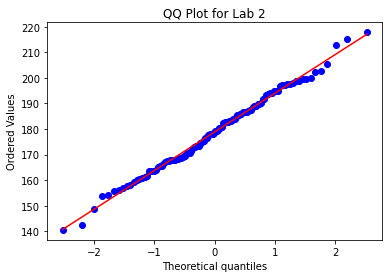

In [34]:
stats.probplot(lab_tat_df['lab2'],dist='norm',plot=plt)
plt.title('QQ Plot for Lab 2')
plt.show()

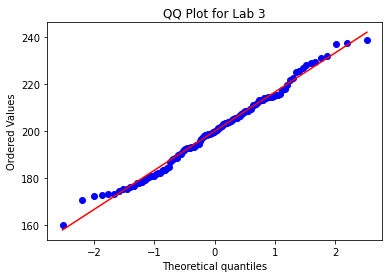

In [35]:
stats.probplot(lab_tat_df['lab3'],dist='norm',plot=plt)
plt.title('QQ Plot for Lab 3')
plt.show()

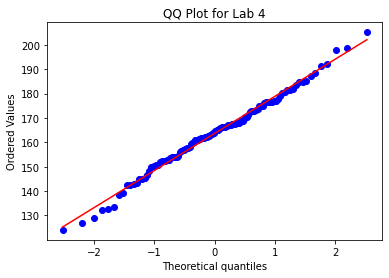

In [36]:
stats.probplot(lab_tat_df['lab4'],dist='norm',plot=plt)
plt.title('QQ Plot for Lab 4')
plt.show()

 One - Way Anova

In [37]:

p = stats.f_oneway(lab_tat_df.lab1,lab_tat_df.lab2,lab_tat_df.lab3,lab_tat_df.lab3)
print("One way Anova result",p)

One way Anova result F_onewayResult(statistic=76.75683342056706, pvalue=1.6416003821741989e-40)


Now , given significance level α = 0.05
So p-value is much less than α.If p<α we reject
null hypothesis and accept alternate hypothesis.So ,there is a significant difference in the average TAT for all the labs.

# Q 3. Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

Step 1 : Define null and alternative hypothesis

Null Hypothesis : Propotions of Male and Feamle are equal .

Alternate Hypothesis :Propotions of Male and Feamle are not equal 

In [38]:
buyer_ratio_df = pd.read_csv('BuyerRatio.csv')
buyer_ratio_df.head(10)

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


Here input variables East,West,North and South are discrete and output variable is also discrete.
So, we will use chi-square test.

In [39]:
#Converting dataframe male and female values in array
buyer_ratio_df_array = buyer_ratio_df.iloc[:,1:6].values
buyer_ratio_df_array

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]], dtype=int64)

chi-square test for Association

chi2, p, dof, exp = stats.chi2_contingency(df_array) 

Here :

chi2 : float

The test statistic.

p : float

The p-value of the test

dof : int

Degrees of freedom

expected : ndarray, same shape as observed

The expected frequencies, based on the marginal sums of the table.



In [40]:
chi2, p, dof, exp = stats.chi2_contingency(buyer_ratio_df_array) 
print('Chi2 :',chi2,"\n",'p-value :', p,"\n",'dof :', dof,"\n",'exp :', exp)

Chi2 : 1.595945538661058 
 p-value : 0.6603094907091882 
 dof : 3 
 exp : [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


Here p-value >0.05 so we can't reject reject null hypothesis.
Hence ,Propotions of Male and Feamle are equal .

# Q4 .TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

Step 1 : Define null and alternative hypothesis

Null Hypothesis H0: Defective % does not vary by centre .

Alternate Hypothesis H1: Defective % varies by centre  

In [41]:
customer_order_df = pd.read_csv('Costomer+OrderForm.csv')
customer_order_df.head(10)

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
5,Error Free,Error Free,Error Free,Error Free
6,Error Free,Defective,Error Free,Error Free
7,Error Free,Error Free,Error Free,Error Free
8,Error Free,Error Free,Error Free,Error Free
9,Error Free,Error Free,Error Free,Error Free


In [42]:
customer_order_df.isna().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [43]:
customer_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [44]:
customer_order_df.describe(include='all').T

,count,unique,top,freq
Phillippines,300,2,Error Free,271
Indonesia,300,2,Error Free,267
Malta,300,2,Error Free,269
India,300,2,Error Free,280


In [45]:
customer_order_df['Phillippines'].unique()

array(['Error Free', 'Defective'], dtype=object)

In [46]:
customer_order_df['Indonesia'].unique()

array(['Error Free', 'Defective'], dtype=object)

In [47]:
customer_order_df['Malta'].unique()

array(['Defective', 'Error Free'], dtype=object)

In [48]:
customer_order_df['India'].unique()

array(['Error Free', 'Defective'], dtype=object)

<AxesSubplot:xlabel='Phillippines', ylabel='count'>

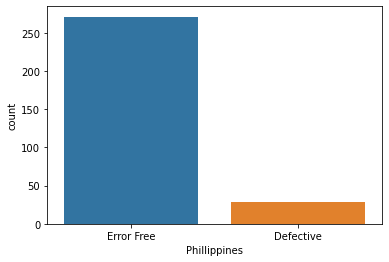

In [49]:
sns.countplot(x=customer_order_df['Phillippines'])

In [50]:
phillp_err_free_count =customer_order_df['Phillippines'][customer_order_df['Phillippines']=='Error Free'].value_counts()
phillp_err_free_count

Error Free    271
Name: Phillippines, dtype: int64

In [51]:
phillp_defect_count =customer_order_df['Phillippines'][customer_order_df['Phillippines']=='Defective'].value_counts()
phillp_defect_count

Defective    29
Name: Phillippines, dtype: int64

<AxesSubplot:xlabel='Indonesia', ylabel='count'>

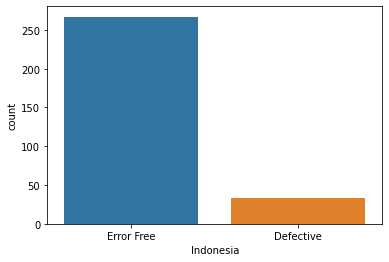

In [52]:
sns.countplot(x=customer_order_df['Indonesia'])

In [53]:
indo_err_free_count =customer_order_df['Indonesia'][customer_order_df['Indonesia']=='Error Free'].value_counts()
indo_err_free_count

Error Free    267
Name: Indonesia, dtype: int64

In [54]:
indo_defect_count =customer_order_df['Indonesia'][customer_order_df['Indonesia']=='Defective'].value_counts()
indo_defect_count

Defective    33
Name: Indonesia, dtype: int64

<AxesSubplot:xlabel='Malta', ylabel='count'>

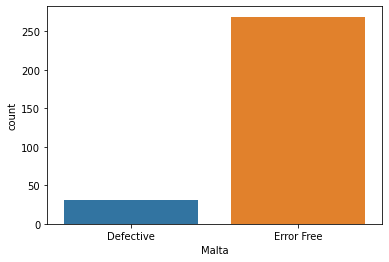

In [55]:
sns.countplot(x=customer_order_df['Malta'])

In [56]:
malta_err_free_count =customer_order_df['Malta'][customer_order_df['Malta']=='Error Free'].value_counts()
malta_err_free_count

Error Free    269
Name: Malta, dtype: int64

In [57]:
malta_defect_count =customer_order_df['Malta'][customer_order_df['Malta']=='Defective'].value_counts()
malta_defect_count

Defective    31
Name: Malta, dtype: int64

<AxesSubplot:xlabel='India', ylabel='count'>

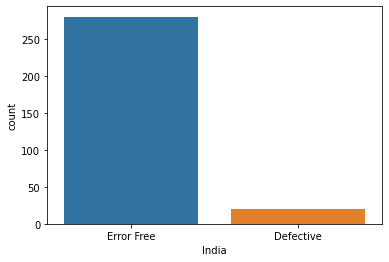

In [58]:
sns.countplot(x=customer_order_df['India'])

In [59]:
india_err_free_count =customer_order_df['India'][customer_order_df['India']=='Error Free'].value_counts()
india_err_free_count

Error Free    280
Name: India, dtype: int64

In [60]:
india_defect_count =customer_order_df['India'][customer_order_df['India']=='Defective'].value_counts()
india_defect_count

Defective    20
Name: India, dtype: int64

In [61]:
customer_order_df.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


As values are discrete so we will use chi-square test.

In [62]:
#Converting dataframe values in array
customer_order_df_array = np.array([[271,267,269,280],
                    [29,33,31,20]])
customer_order_df_array


array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [63]:
chi2, p, dof, exp = stats.chi2_contingency(customer_order_df_array) 
print('Chi2 :',chi2,"\n",'p-value :', p,"\n",'dof :', dof,"\n",'exp :', exp)

Chi2 : 3.858960685820355 
 p-value : 0.2771020991233135 
 dof : 3 
 exp : [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


Here p-value >0.05 so we can't reject reject null hypothesis. Hence, Defective % does not vary by centre .